## Final Project Submission

Please fill out:
* Student names: Muhsin Ahmed
                 Stephen N. Kariuki
                 Joan Wambua
                 Stella Ndegwa
                 Immaculate Mwendwa
                 Shalom Irungu


* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:Sam Jane
* Blog post URL:


## Introduction




**Business problem:**

The real estate agency aims to provide valuable advice to homeowners on how specific home features will impact the estimated value of their homes. The primary objective is to help homeowners make informed decisions about which features could potentially yield the highest return on investment in terms of increased property value.





**Data:**


We have been provided with The King County House Sales dataset which contains property sales between year 2014 - 2015 and 21,420 records of houses sold. Each record in the data set gives features such as number of bedrooms, the size of various rooms in square feet, about the individual homes.


Column descriptions for King County Data Set














*   id - unique identified for a house
*   dateDate - house was sold
*   pricePrice - is prediction target
*   bedroomsNumber - of Bedrooms/House
*   bathroomsNumber - of bathrooms/bedrooms
*   sqft_livingsquare - footage of the home
*   sqft_lotsquare - footage of the lot
*   floorsTotal - floors (levels) in house
*   waterfront - House which has a view to a waterfront
*   view - Has been viewed
*   condition - How good the condition is ( Overall )
*   grade - overall grade given to the housing unit, based on King County
*   grading system
*   sqft_above - square footage of house apart from basement
*   sqft_basement - square footage of the basement
*   yr_renovated - Year when house was renovated
*   zipcode - zip
*   yr_built - Built Year
*   lat - Latitude coordinate
*   long - Longitude coordinate
*   sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
*   sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

















   # Objectives
   1. Develop a model that will assist home buyers and home sellers identify attributes that influence the prices of houses.
   
   2. Develop regression models that will guide the real eatate agencies on pricing.

   3. Determine features that have the biggest impact on the sale price of a house and by how much.
   




#Data understanding


In [7]:
#Loading libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

In [8]:
# load data, count number of unique entries and scope in terms of timeline

file_path="data/kc_house_data.csv"
df = pd.read_csv(file_path)

# convert 'date' column to date format
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the year
df['year'] = df['date'].dt.year

# Display the range of years
min_year = df['year'].min()
max_year = df['year'].max()

unique_id_count = df['id'].nunique()

print(f"The number of sales in the data set is: {unique_id_count}")
print(f"The range of years in the data is from {min_year} to {max_year}")

df.head()

The number of sales in the data set is: 21420
The range of years in the data is from 2014 to 2015


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [9]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [10]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [11]:
print("The number of rows is :",df.shape[0])
print("The number of columns is :",df.shape[1])

The number of rows is : 21597
The number of columns is : 22


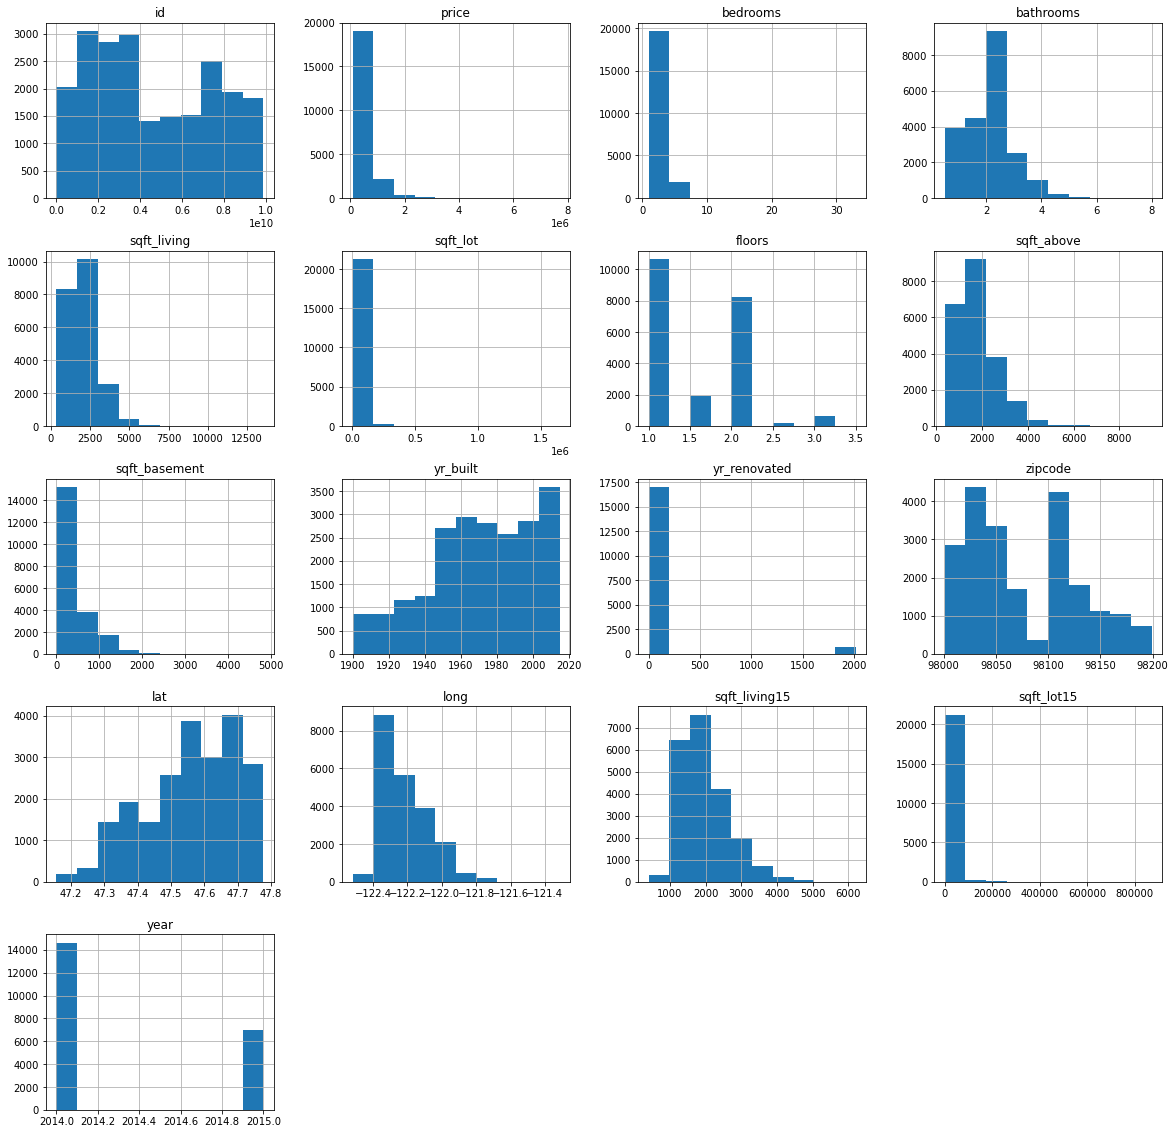

In [12]:
df.hist(figsize=(20,20));

Observation: most variables is that they don't follow a normal distribution.This may create some issues with some regression assumptions.

In [13]:
# statistical description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


## Data Preparation






Here we will check for duplicates and eliminate them if any, check for missing or null values, outliers and decide on the most appropriate method of handling them and also look at the data types and format them to the most appropriate data type that is suitable for our analysis.

## Handling missing values

In [14]:
# checking for duplicates
df.duplicated().sum()

0

Now that we have confirmed there are no duplicates in our data, we create a function that calculates the percentage of of null values.

This will come in handy when making decisions on handling the null values.

In [15]:
# analysis of missing data by computing the percentage of the missing data
from pandas.core.dtypes import missing
def missingdataanalysis(data):
    count_nulls = data.isna().sum()
    nulls_percentage = (data.isna().sum()) / (len(data))
    column_names = pd.DataFrame({'Missing Values':count_nulls, 'Percentage':nulls_percentage})
    return column_names

In [16]:
missingdataanalysis(df)

,Missing Values,Percentage
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000
waterfront,2376,0.110015
view,63,0.002917


In [17]:
# checking the unique values in waterfront
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [18]:
#filling the missing values in waterfront using the mode method
mode_value = df['waterfront'].mode().iloc[0]
df['waterfront'].fillna(mode_value, inplace=True)


In [19]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
# replacing the missing values with NONE
df["view"].replace({np.nan:"NONE"},inplace=True)

In [21]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
df["yr_renovated"].replace({np.nan:0.0},inplace=True)

In [23]:
# confirming if missing values have been handled
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
year               0
dtype: int64

In [24]:
# feature engineering
df["Age_sold"]=df['date'].dt.year-df["yr_built"]

In [25]:
columns_to_drop=["id","date","yr_renovated","yr_built","sqft_basement"]
df.drop(columns=columns_to_drop,inplace=True)

In [26]:
# Check added column "Age_sold" and dropping of column "date","yr_built"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  year           21597 non-null  int64  
 17  Age_sold       21597 non-null  int64  
dtypes: flo

In [27]:
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age_sold
14529,425000.0,3,1.50,1120,6653,1.0,NO,NONE,Good,7 Average,1120,98133,47.7321,-122.334,1580,7355,2015,78
7251,308950.0,4,2.50,1920,8562,2.0,NO,AVERAGE,Good,7 Average,1920,98022,47.1932,-122.008,1820,8628,2014,20
7988,259900.0,4,2.75,1560,8820,1.0,NO,GOOD,Average,7 Average,1060,98001,47.3382,-122.257,2140,7800,2014,35
13272,600000.0,3,1.75,1880,6360,1.0,NO,NONE,Good,7 Average,1040,98115,47.6878,-122.286,1770,6175,2014,69
744,395000.0,3,1.00,1500,4000,1.0,NO,NONE,Average,6 Low Average,900,98117,47.6921,-122.380,950,4000,2014,89



# Handling Categorical Data

  Here we change categorical data to numerical data.
  We will use Label Encoding where there is an ordinal relationship and

  One-Hot Encoding when there is no ordinal relationship.

We have 3 categorical data i.e waterfront,condition and grade



In [28]:
#hot encoding the water front variable
df["waterfront"].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

here we can replace the "NO" and "YES" with 0 and 1 since they have
a binary relationship

In [29]:
df["waterfront"]=df["waterfront"].replace({"YES":1,"NO":0})


In [30]:
#hot encoding  the condition column
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Open the "column.names.md" file and follow the link (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
 under the condition column to understand the scale of each condition.


BUILDING CONDITION
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.


In [31]:
#replacing the categorical values in 'condition' to numeric values
df["condition"]=df["condition"].replace({"Poor":1,"Fair":2,"Average":3,"Good":4,"Very Good":5})

In [32]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

BUILDING GRADE

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [33]:
# Define the mapping of categorical values to numeric values
grade_mapping = {
    "3 Poor": 3,
    "4 Low": 4,
    "5 Fair": 5,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Replace the values in the 'grade' column with numeric values
df['grade'] = df['grade'].replace(grade_mapping)

In [34]:
df['grade']=df['grade'].astype(int)

we still have to deal with the categorical variables, otherwise when we try to build our models it will inteprete
the information provided incorrectly
"view","condtion","grade"

In [35]:
df["view"]=df["view"].replace({"NONE":0,"AVERAGE":1, "GOOD":2 ,"FAIR":3 ,"EXCELLENT":4})

df["view"].value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [36]:
df.sample()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age_sold
7140,605000.0,2,2.0,1270,5500,1.5,0,0,4,8,1270,98122,47.6121,-122.294,1870,4400,2014,93


EXPLANATORY DATA ANALYSIS

Using Features and attributes with High correlation.

In [37]:
# Assignining variables to the columns
price = df['price']
bathrooms = df['bathrooms']
bedrooms = df['bedrooms']
grade = df['grade']
floors = df['floors']
sqft_living = df['sqft_living']
condition = df['condition']
waterfront = df['waterfront']
view = df['view']
sqft_living15= df['sqft_living15']


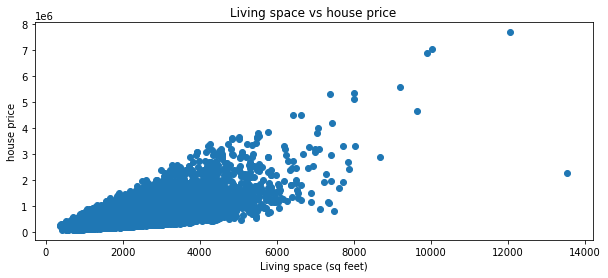

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living', y='price', data=df)
ax.set_xlabel('Living space (sq feet)')
ax.set_ylabel('house price')
ax.set_title('Living space vs house price');

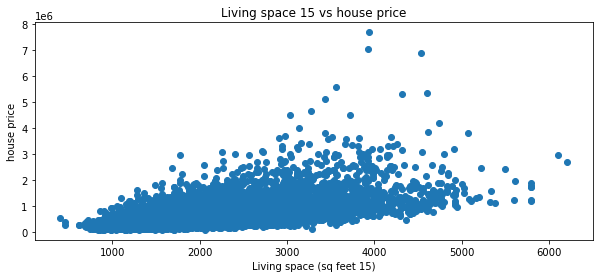

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living15', y='price', data=df)
ax.set_xlabel('Living space (sq feet 15)')
ax.set_ylabel('house price')
ax.set_title('Living space 15 vs house price');

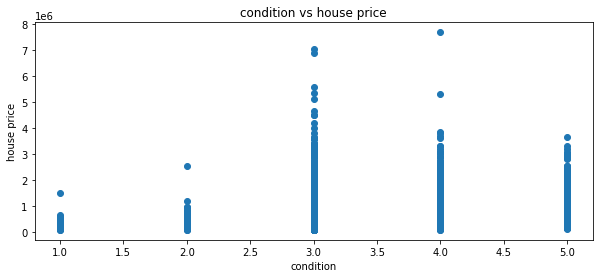

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'condition', y='price', data=df)
ax.set_xlabel('condition')
ax.set_ylabel('house price')
ax.set_title('condition vs house price');

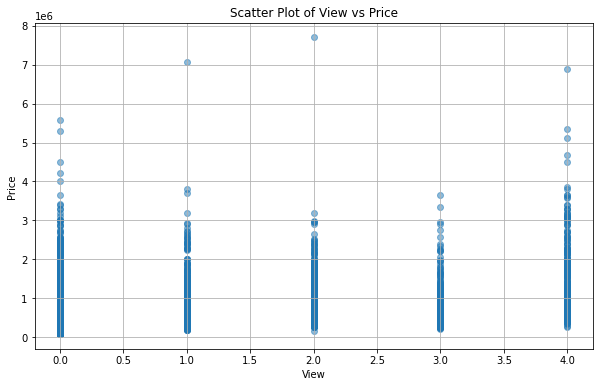

In [41]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['view'], df['price'], alpha=0.5)
plt.title('Scatter Plot of View vs Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid(True)
plt.show()

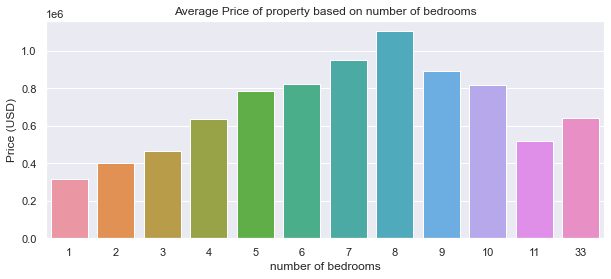

In [42]:
# grouping bedrooms
x = df.groupby(['bedrooms'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='number of bedrooms', ylabel='Price (USD)');

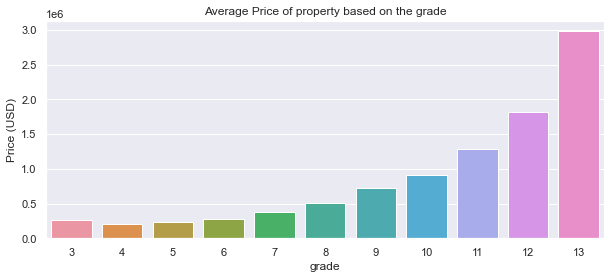

In [43]:
# grouping floors
x = df.groupby(['grade'])[['price']].median()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on the grade',
                                  xlabel='grade', ylabel='Price (USD)');

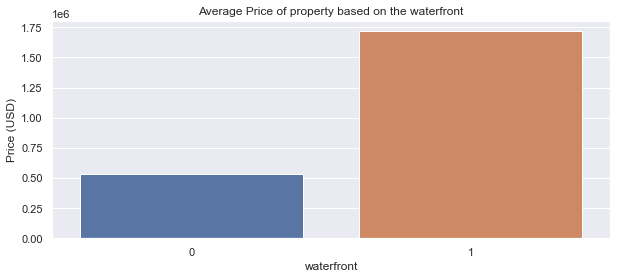

In [44]:
# grouping waterfront
x = df.groupby(['waterfront'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on the waterfront',
                                  xlabel='waterfront', ylabel='Price (USD)');

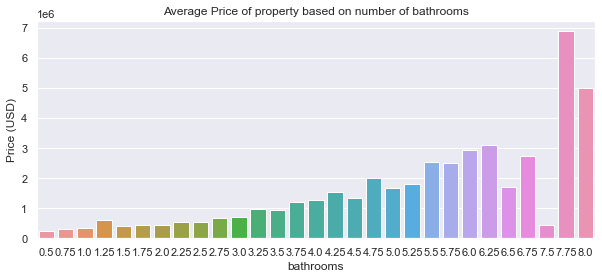

In [45]:
# grouping bathrooms
x = df.groupby(['bathrooms'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on number of bathrooms',
                                  xlabel='bathrooms', ylabel='Price (USD)');

### Handling outliers


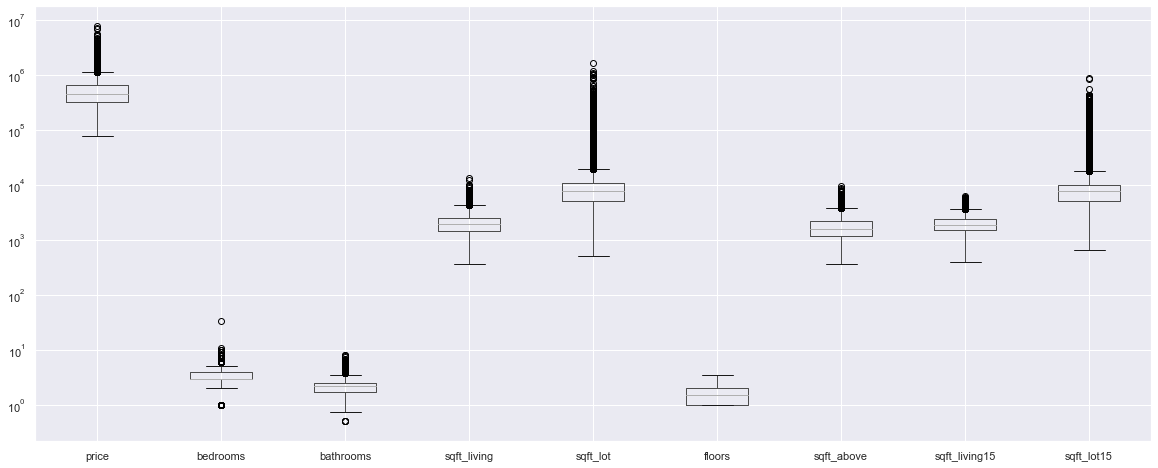

In [46]:
# visualize data to assess outliers
columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_living15', 'sqft_lot15',]
df[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [47]:
# Define the columns to check for outliers
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_living15', 'sqft_lot15']

print("Summary statistics before removing outliers:")
print(df[columns].describe())
# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from each column
data = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean       1.494096   1788.596842    1986.620318   12758.283512  
std        0.539683    827.759761     685.230

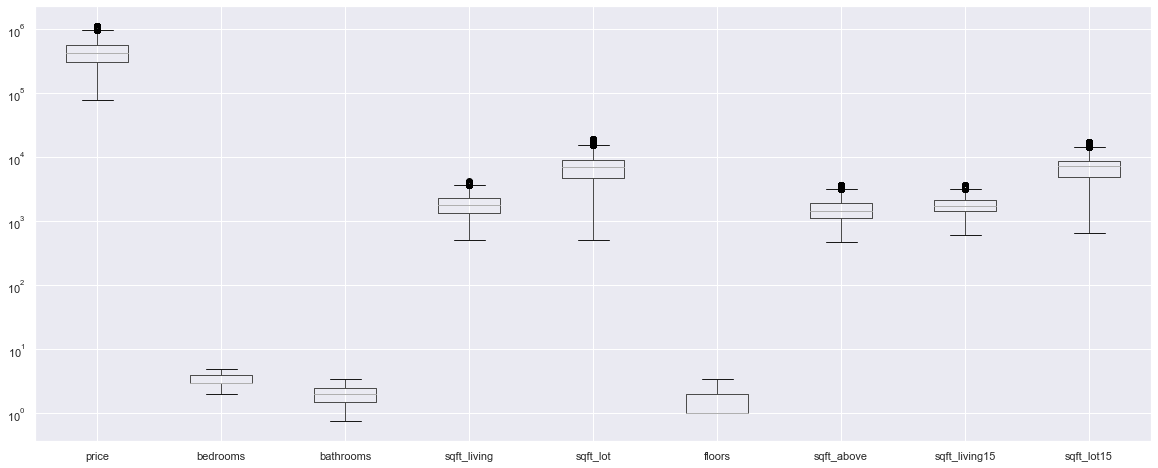

In [48]:
# Box plots after removing outliers
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [49]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,98074,47.6168,-122.045,1800,7503,2015,28


### MODELLING


Here we seek to understand our independednt variables against the dependent variable.

In [50]:
columns1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living','grade','lat','long',
       'sqft_lot', 'floors','sqft_above', 'sqft_living15', 'sqft_lot15', 'condition', 'waterfront','view']

                  price  bedrooms  bathrooms  sqft_living     grade       lat  \
price          1.000000  0.261099   0.387530     0.566245  0.580148  0.463546   
bedrooms       0.261099  1.000000   0.464395     0.609434  0.311383 -0.066073   
bathrooms      0.387530  0.464395   1.000000     0.684312  0.593082 -0.032483   
sqft_living    0.566245  0.609434   0.684312     1.000000  0.661436 -0.003473   
grade          0.580148  0.311383   0.593082     0.661436  1.000000  0.078397   
lat            0.463546 -0.066073  -0.032483    -0.003473  0.078397  1.000000   
long           0.005225  0.165074   0.251404     0.252664  0.196370 -0.166469   
sqft_lot      -0.036149  0.204663  -0.047025     0.203114  0.033150 -0.145249   
floors         0.236368  0.136247   0.514164     0.316460  0.458049  0.018805   
sqft_above     0.442997  0.479009   0.602483     0.822618  0.664637 -0.080758   
sqft_living15  0.500501  0.407484   0.516623     0.729109  0.633419 -0.008130   
sqft_lot15    -0.044877  0.1

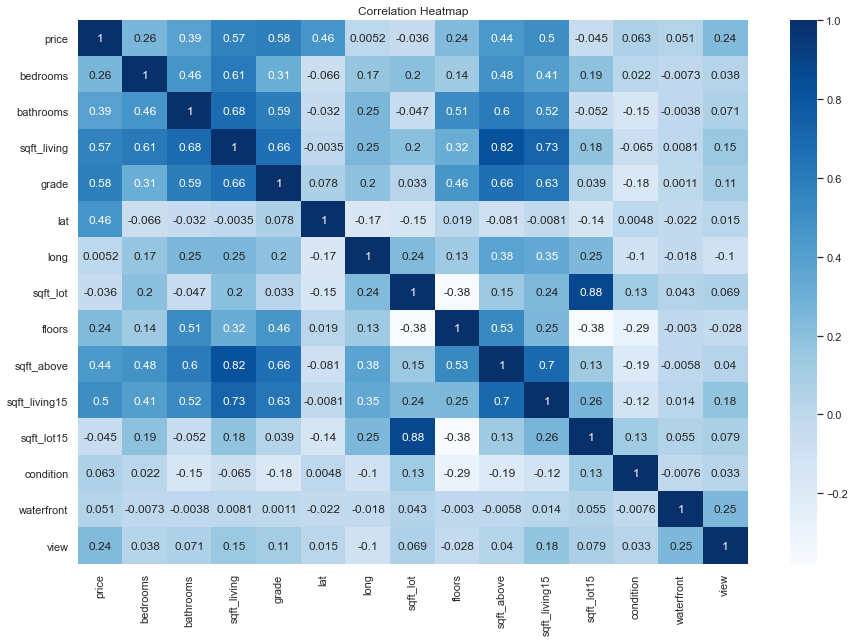

In [51]:
#showing the correlation between variables
corr_matrix=data[columns1].corr()
print(corr_matrix)

# Plotting the correlation matrix heat map
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [52]:

col = []
correlations = []
for index, correlation in corr_matrix['price'].T.items():
    if correlation >= .30 and index != 'price':
        col.append(index)
        correlations.append(correlation)
corr_df = pd.DataFrame({'Correlations':correlations, 'Features': col}).sort_values(by=['Correlations'], ascending = False)

In [53]:
Multicollinear_Features = []
Multicollinear_Corr = []
def multicollinearity_test(feature):
    for index, correlation in corr_matrix[feature].T.items():
        if correlation >= .75 and index != feature:
            Multicollinear_Features.append([feature, index])
            Multicollinear_Corr.append(correlation)

for feature in corr_matrix:
    multicollinearity_test(feature)
Multicollenear_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'])

In [54]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price            1.000000
grade            0.580148
sqft_living      0.566245
sqft_living15    0.500501
lat              0.463546
sqft_above       0.442997
bathrooms        0.387530
bedrooms         0.261099
floors           0.236368
view             0.235892
condition        0.063406
waterfront       0.050809
long             0.005225
sqft_lot        -0.036149
sqft_lot15      -0.044877
Name: price, dtype: float64

In [55]:
print('Correlations with Price')
display(corr_df)
print('Multicollinear Features')
display(Multicollenear_df)

Correlations with Price


,Correlations,Features
2,0.580148,grade
1,0.566245,sqft_living
5,0.500501,sqft_living15
3,0.463546,lat
4,0.442997,sqft_above
0,0.387530,bathrooms


Multicollinear Features


,Correlations,Features
0,0.822618,"[sqft_living, sqft_above]"
2,0.822618,"[sqft_above, sqft_living]"
1,0.876797,"[sqft_lot, sqft_lot15]"
3,0.876797,"[sqft_lot15, sqft_lot]"


We will drop columns that have a high multicolleneality(sqft_lot,sqft_lot15,sqft_above).



Reason:Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

# Baseline Model

We will build our baseline model using sqft_living because it has the strongest correlation with Price.

In [56]:
# Defining a function for our linear regression model
def model_Plots(model, x, x_name, y):

    residuals = model.resid

    f, axes = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False, figsize=(35,12), squeeze=False)

    f.text(s="Residuals Summary", x=.42, y=1.15, fontsize=55)
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=35)
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=35)

    f.text(s='Residuals Histogram', x=.65, y=.95, fontsize=45)

    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])

    f.text(s='QQ Plot', x=.25, y=.95, fontsize=45)

    axes[0][1].hist(residuals)
    plt.show;


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

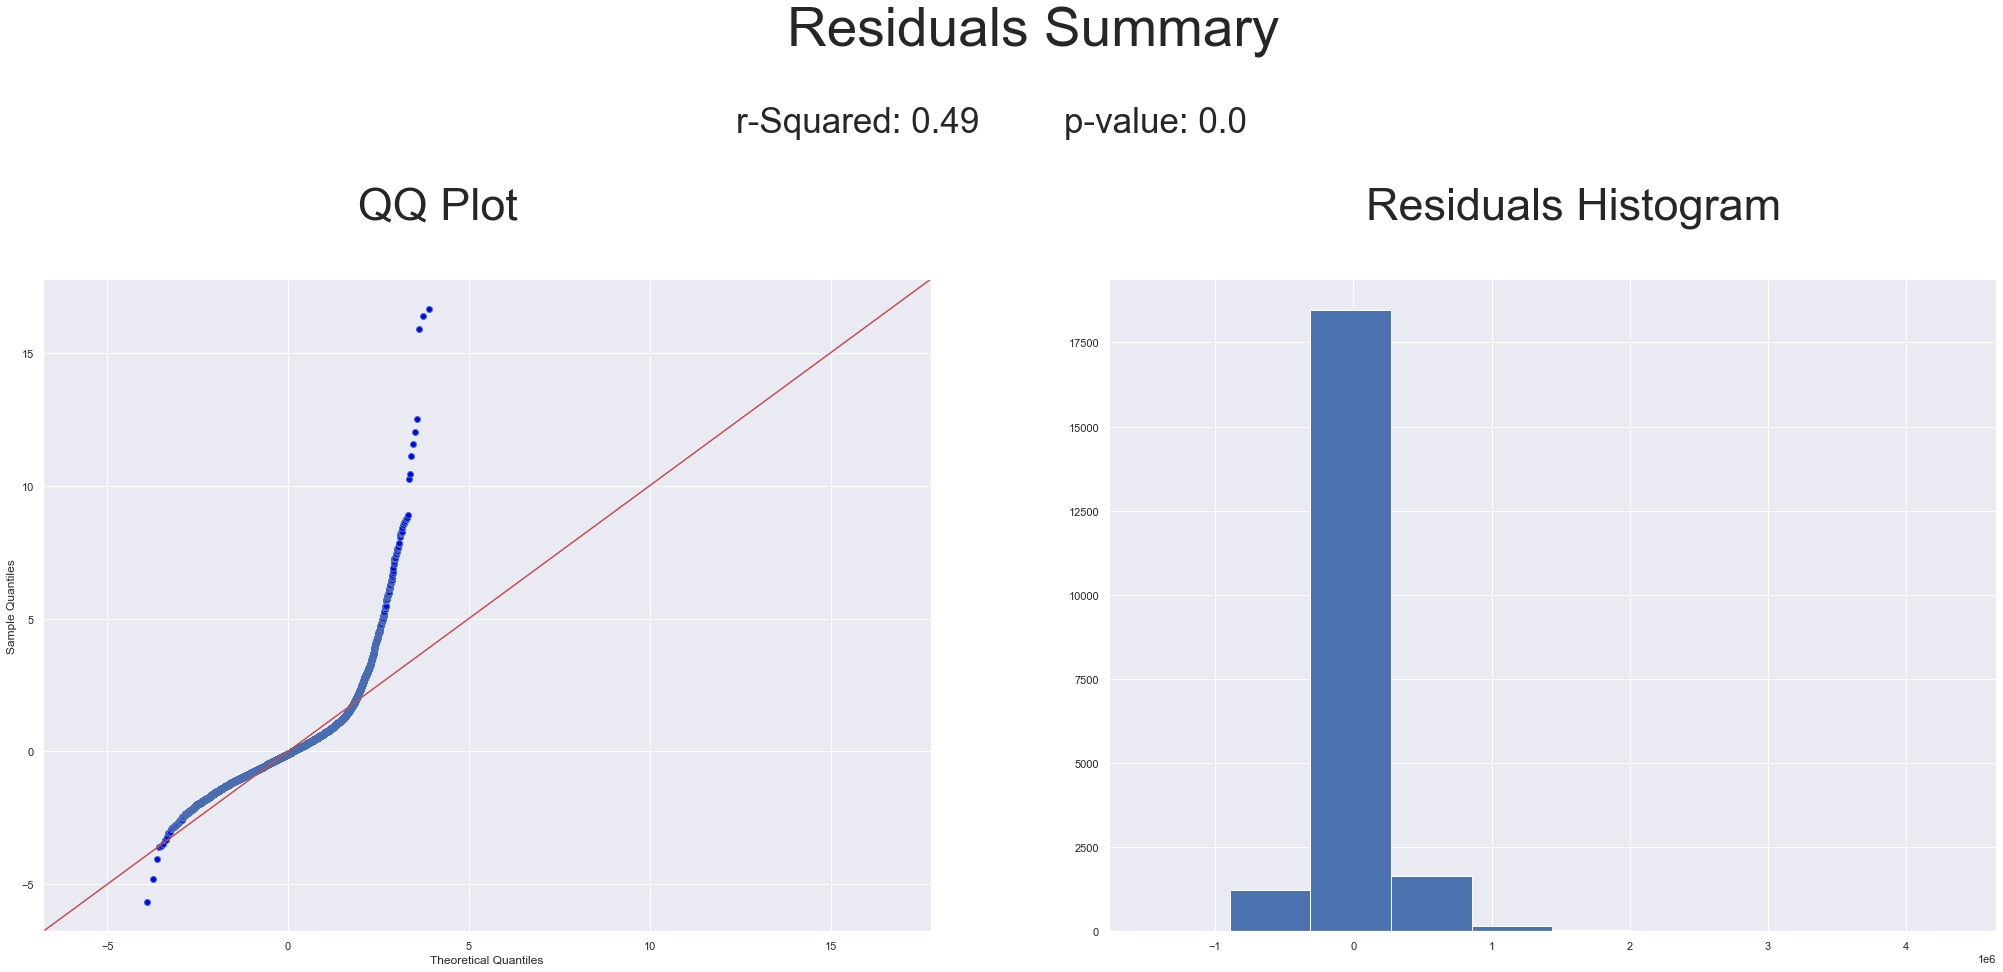

In [57]:
#baseline model based on sqft_living
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X = df['sqft_living']

# Add a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# y represents the target variable
y = df['price']

# Create and fit the OLS (Ordinary Least Squares) model
model1a = sm.OLS(y, X).fit()

# Display the summary of the model

print(model1a.summary())

# RMSE
rmse = np.sqrt(model1a.mse_resid)


print("THE RMSE: ", rmse)

model_Plots(model1a, sqft_living,'sqft_living',price)
print(model1a.summary())

Text(0.5, 1.0, 'distribution of residuals')

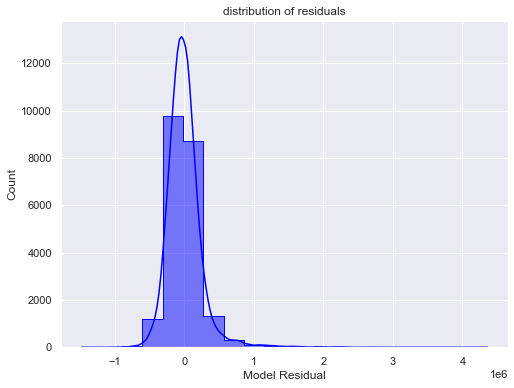

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(model1a.resid, bins=20, element="step", kde=True, color='blue', ax=ax)
ax.set_xlabel("Model Residual")
ax.set_title('distribution of residuals')

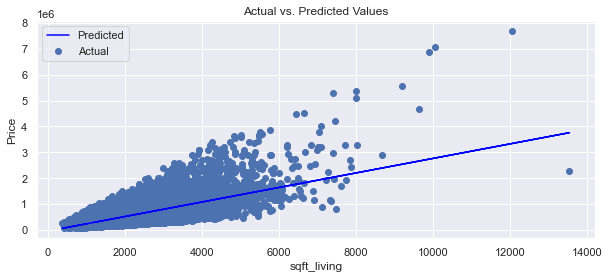

In [59]:
# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(df['sqft_living'], model1a.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Interpretation of baseline regression results.
R-squared: The R-squared value is 0.493, indicating that approximately 49.3% of the variance in price can be explained by the sqft_living.

The model is statistically significant overall, with an F-statistic p-value well below 0.05 .The intercept is USD -4.399e+04   meaning that when all other variables are zero the estimated price is  USD -4.399e+04
The coefficient is 280 meaning that for every unit increase in sqaure footage of sqft_living,the price increases by USD 280.8




The model violates the normality assumptions of linear regression and homoscedasticity.

To address these issues, we need to perform log transformations on the dependent variable sqft_living and price.

In [60]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

THE RMSE:  0.37851268142626154
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:04   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2

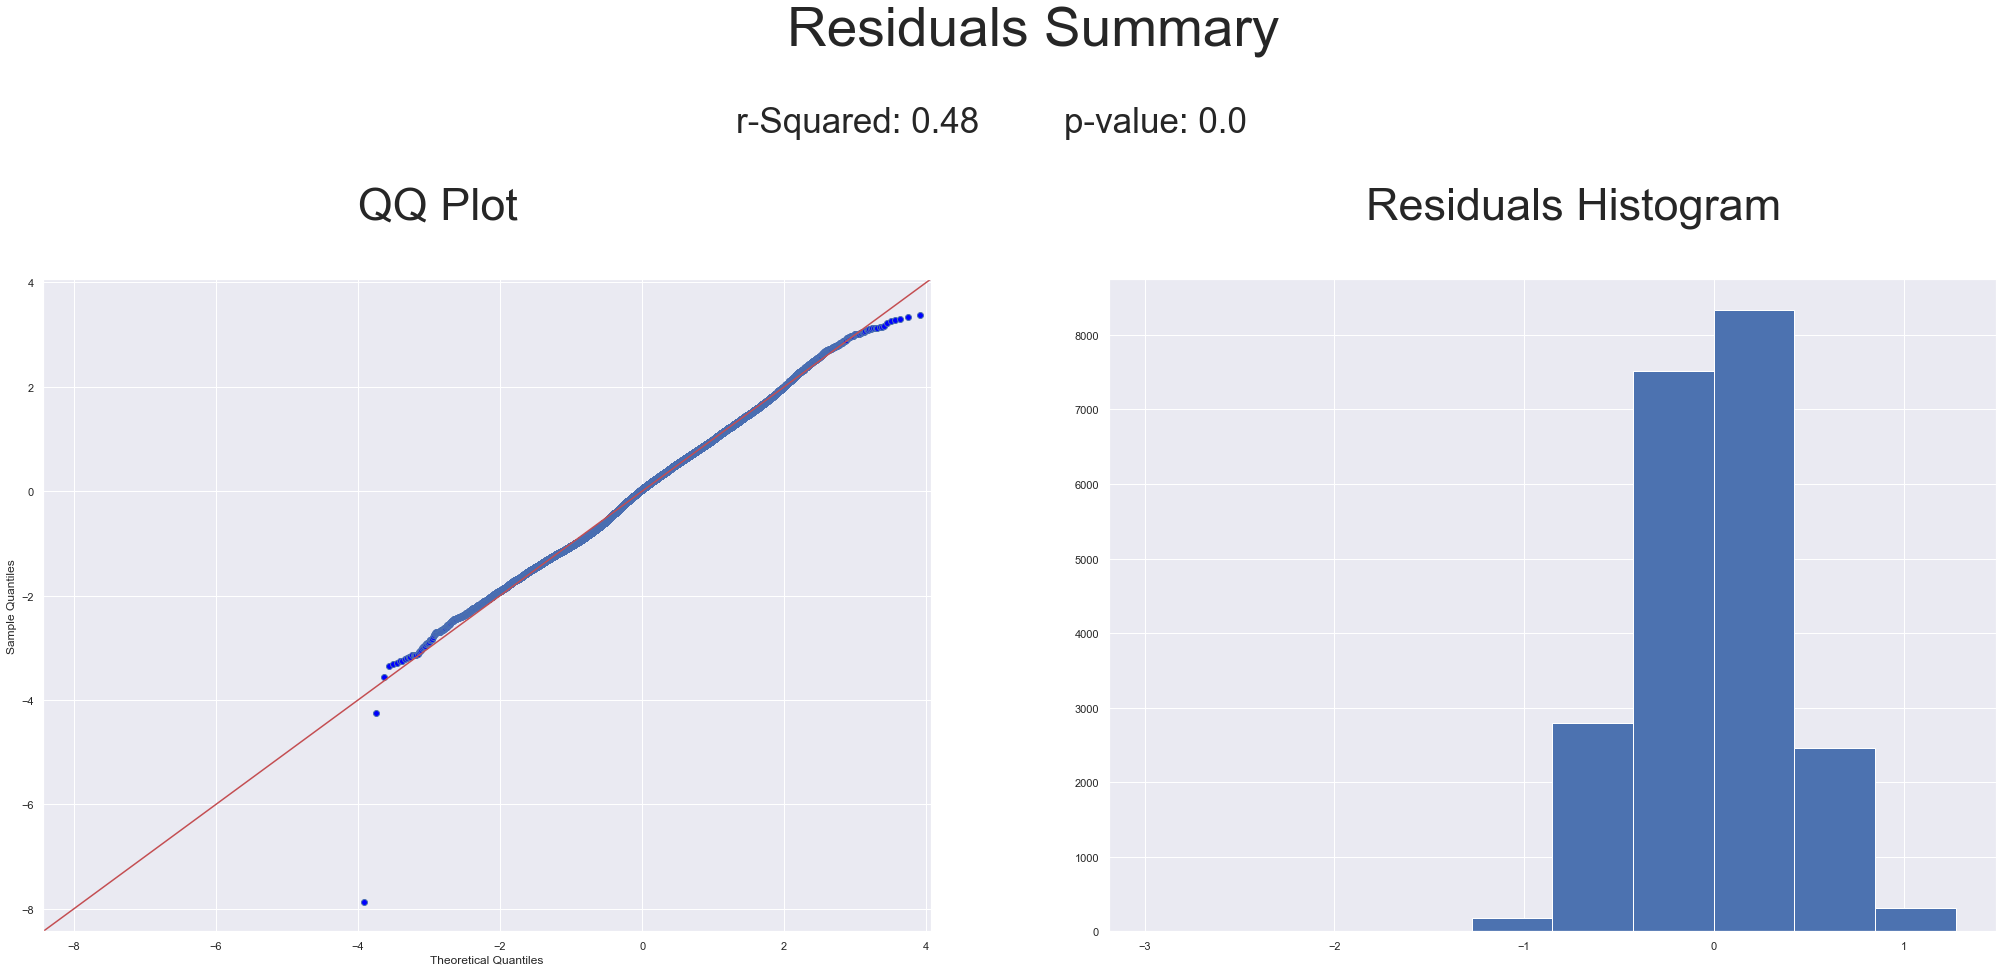

In [61]:
# Log transformation (For price and sqft_living)
df['price'] = np.log(df['price'])

f = 'price~sqft_living'
model1b = smf.ols(formula=f, data=df).fit()


# RMSE
rmse = np.sqrt(model1b.mse_resid)


print("THE RMSE: ", rmse)

model_Plots(model1b, df['sqft_living'], 'sqft_living', price)
print(model1b.summary())

The R-squared has slightly reduced but the the the normality and Homoscedasticity has improved as well.

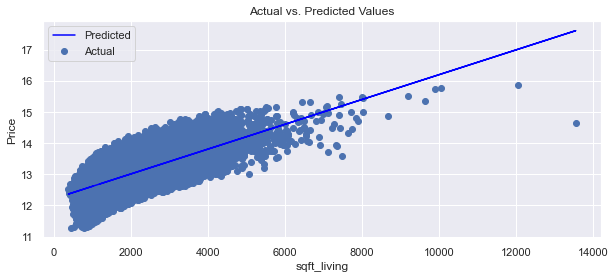

In [62]:
# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(df['sqft_living'], model1b.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Text(0.5, 1.0, 'distribution of residuals after transformation ')

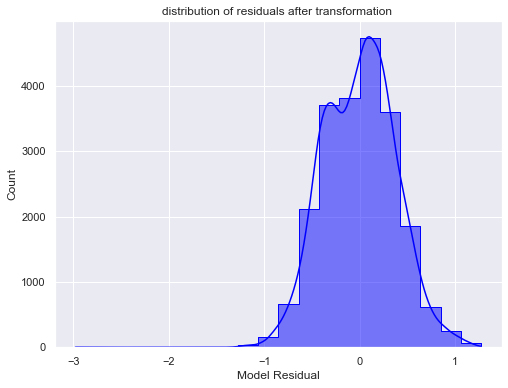

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(model1b.resid, bins=20, element="step", kde=True, color='blue', ax=ax)
ax.set_xlabel("Model Residual")
ax.set_title('distribution of residuals after transformation ')

# MULTIPLE REGRESSION

***Null Hypotehsis***: There is no relationship of the varaibles and the price

***Alternative Hypothesis***: There is a relationship of the variables and the price

# Model 2

Our first multilinear regression model includes all the selected variables.

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

y = 'price'
X = list(df.columns)
X.remove('price')

indepent_var = '+'.join(X)
formula = y + '~' + indepent_var
model2 = ols(formula=formula, data=df).fit()

# RMSE
rmse = np.sqrt(model2.mse_resid)


print("THE RMSE: ", rmse)

THE RMSE:  0.2516752196314579


In [65]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     4291.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:05   Log-Likelihood:                -840.25
No. Observations:               21597   AIC:                             1716.
Df Residuals:                   21579   BIC:                             1860.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -105.2403      8.254    -12.750      0.000    -121.419     -89.062
bedrooms         -0.0136      0.002     -5.722      0.000      -0.018      -0.009
bathrooms         0.0745      0.004     18.391      0.000       0.067       0.082
sqft_living       0.0002   5.49e-06     27.782      0.000       0.000       0.000
sqft_lot       4.717e-07   5.99e-08      7.873      0.000    3.54e-07    5.89e-07
floors            0.0797      0.004     17.720      0.000       0.071       0.089
waterfront        0.3626      0.023     15.761      0.000       0.317       0.408
view              0.0700      0.003     23.641      0.000       0.064       0.076
condition         0.0608      0.003     20.964      0.000       0.055       0.067
grade             0.1621      0.003     60.117      0.000       0.157       0.167
sqft_above    -1.724e-05   5.44e-06     -3.170      0.002   -2.79e-05   -6.58e-06
zipcode          -0.0006   4.12e-05    -15.705      0.000      -0.001      -0.001
lat               1.3920      0.013    103.884      0.000       1.366       1.418
long             -0.1496      0.016     -9.090      0.000      -0.182      -0.117
sqft_living15  9.656e-05   4.31e-06     22.416      0.000    8.81e-05       0.000
sqft_lot15    -2.417e-07   9.17e-08     -2.636      0.008   -4.21e-07    -6.2e-08
year              0.0471      0.004     12.834      0.000       0.040       0.054
Age_sold          0.0037    8.6e-05     43.022      0.000       0.004       0.004
==============================================================================
Omnibus:                      402.361   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.829
Skew:                          -0.043   Prob(JB):                    1.93e-182
Kurtosis:                       3.960   Cond. No.                     4.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

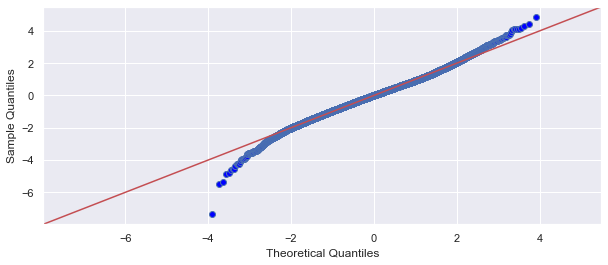

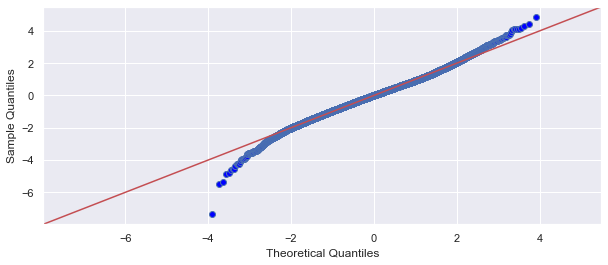

In [66]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

# Interpretation
R-squared: The R-squared value is 0.772, indicating that approximately 77.2% of the variance in price can be
explained by  the 16 independent variables.

The model is statistically significant overall, with an F-statistic p-value well below 0.05
the intercept is -110.9581 meaning that when all other variables are zero the estimated price is -110.9581.

Statistical Significance: all the predictors  are statistically significant with zero  p-values .
condition number:Cond. No.4.85e+08,this suggest there is high multicollinearity

*italicized text*
The model has a high R-Squared of 0.773 showing that 77.3% of variance in price is explained. However, there is non-normality in residuals and the condition number is high showing that there is high collinearity between the variables. Next, we do feature selection to enhance the model.

In [67]:
correlation_matrix = df.assign(price=df['price']).corr()
correlation_with_price = correlation_matrix['price'].drop('price')
correlation_with_price

bedrooms         0.343360
bathrooms        0.551249
sqft_living      0.695185
sqft_lot         0.100025
floors           0.310630
waterfront       0.170720
view             0.332736
condition        0.038918
grade            0.703720
sqft_above       0.601579
zipcode         -0.038788
lat              0.448837
long             0.050862
sqft_living15    0.619326
sqft_lot15       0.092281
year             0.004972
Age_sold        -0.080499
Name: price, dtype: float64

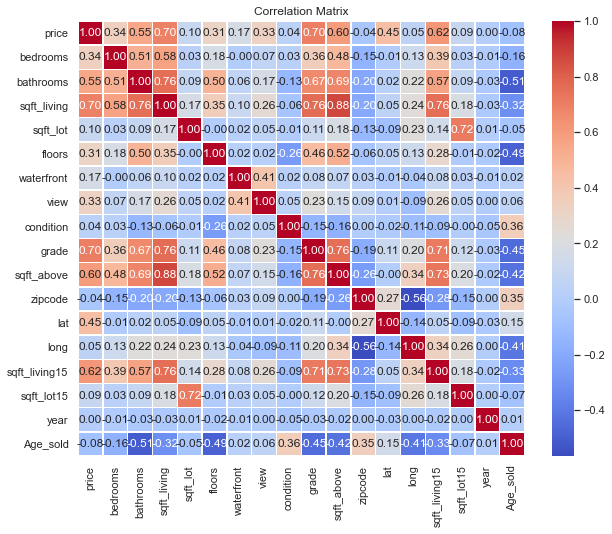

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model 3
## Dealing with multicollinearity

We remove the variables that have low correlation with price and those that have high multicollinearity.

In [69]:

# Determine X and y values

X = df.drop(['price','view','condition', 'Age_sold','year','zipcode','waterfront','lat','long','sqft_above','sqft_lot','sqft_lot15'], axis=1)
X=sm.add_constant(X)
y=df["price"]
M_model3=sm.OLS(y,X).fit()

# RMSE
rmse = np.sqrt(M_model3.mse_resid)


print("THE RMSE: ", rmse)


M_model3.summary()

THE RMSE:  0.34948024594408844


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     4572.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:09   Log-Likelihood:                -7936.2
No. Observations:               21597   AIC:                         1.589e+04
Df Residuals:                   21590   BIC:                         1.594e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2452      0.021    532.420      0.000      11.204      11.287
bedrooms         -0.0185      0.003     -5.703      0.000      -0.025      -0.012
bathrooms        -0.0058      0.005     -1.101      0.271      -0.016       0.005
sqft_living       0.0002   5.61e-06     36.901      0.000       0.000       0.000
floors           -0.0088      0.005     -1.669      0.095      -0.019       0.002
grade             0.1722      0.004     48.237      0.000       0.165       0.179
sqft_living15  7.114e-05   5.64e-06     12.616      0.000    6.01e-05    8.22e-05
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.237
Skew:                           0.088   Prob(JB):                     1.01e-12
Kurtosis:                       2.827   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

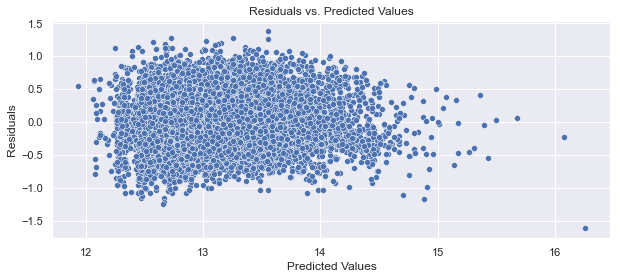

In [70]:
predicted_values = M_model3.fittedvalues

# Create a scatter plot of residuals against predicted values
sns.scatterplot(x=predicted_values, y=M_model3.resid)

# Set labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

# Show the plot
plt.show()

there is linearity and Homoscedasticity residuals are spread consistently across the predicted values.

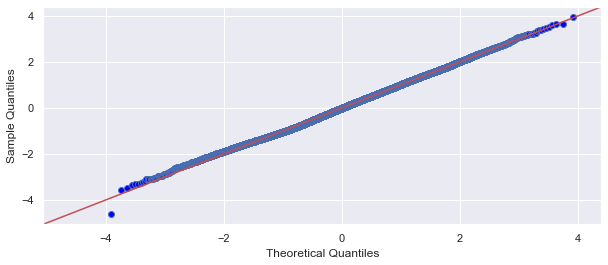

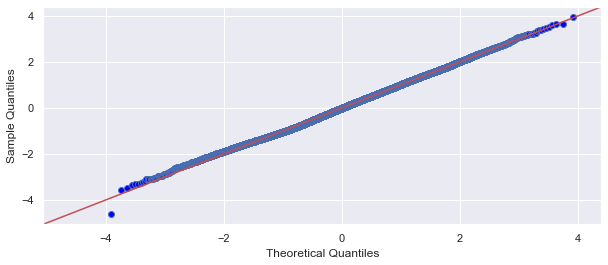

In [71]:
sm.graphics.qqplot(M_model3.resid, dist=stats.norm, line='45', fit=True)

there is improvment of normality from the second mode1

## Interpretation of regression results.


The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.560, indicating that approximately 56.0% of the variance in price can be
explained by 'Bedrooms','Sqft_living','bathrooms','floors','grade','sqft_living15'

the intercept is 11.2452 meaning that when all other variables are zero the estimated log transformed price is 11.2452.


Bedrooms: For each  unit incresea in bedroom, the log-transformed price is expected to decrease by 0.0185 units, holding other variables constant. More bedrooms are associated with a lower log-transformed price, all else being equal.

Bathrooms: The coefficient is not statistically significant.

 sqft_living:For each  unit incresea  in square footage of living space, the log-transformed price is expected to increase by 0.0002 units.This means Larger living spaces are associated with higher log-transformed prices.

Floors:The coefficient is not statistically significant.
Grade: For each additional grade point, the log-transformed price is expected to increase by 0.1722 units.

Sqft_living15:Interpretation: For each additional unit increase in square footage of living space in 2015, the log-transformed price is expected to increase by 0.00007114 units.







the R-squard of model2 has dropped compared to the previous model from 77% to 54.6% .However the cond.no has reduced and the model has better linearity and normality after dealing with the multicollinearity

# Model 4

Here we use categorical variables and sqft_living to predict price.so far we have been using categorical features as ordinal.we'll use One-hot encoding technique used to convert categorical variables into a binary to see if we get better results


In [72]:
df_new=df[['sqft_living','waterfront','view', 'grade']]
y=df['price']
categorical_columns = ['waterfront','view', 'grade']

X=pd.get_dummies(df_new, columns=categorical_columns, drop_first=True)

X=sm.add_constant(X)
M_model4=sm.OLS(y,X).fit()
M_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     1864.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:10   Log-Likelihood:                -7419.8
No. Observations:               21597   AIC:                         1.487e+04
Df Residuals:                   21580   BIC:                         1.501e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.3714      0.341     36.247      0.000      11.702      13.040
sqft_living      0.0002   4.03e-06     49.913      0.000       0.000       0.000
waterfront_1     0.3442      0.035      9.961      0.000       0.276       0.412
view_1           0.1791      0.011     15.645      0.000       0.157       0.202
view_2           0.2237      0.016     14.313      0.000       0.193       0.254
view_3           0.2555      0.019     13.437      0.000       0.218       0.293
view_4           0.3670      0.024     15.377      0.000       0.320       0.414
grade_4         -0.3739      0.348     -1.076      0.282      -1.055       0.307
grade_5         -0.2653      0.342     -0.776      0.438      -0.936       0.405
grade_6         -0.0784      0.341     -0.230      0.818      -0.748       0.591
grade_7          0.1140      0.341      0.334      0.738      -0.555       0.783
grade_8          0.2991      0.341      0.876      0.381      -0.370       0.968
grade_9          0.4955      0.341      1.451      0.147      -0.174       1.165
grade_10         0.6554      0.342      1.918      0.055      -0.014       1.325
grade_11         0.7652      0.342      2.237      0.025       0.095       1.436
grade_12         0.8580      0.344      2.496      0.013       0.184       1.532
grade_13         0.9900      0.355      2.786      0.005       0.294       1.686
==============================================================================
Omnibus:                       21.041   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.594
Skew:                           0.045   Prob(JB):                     5.56e-05
Kurtosis:                       2.882   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

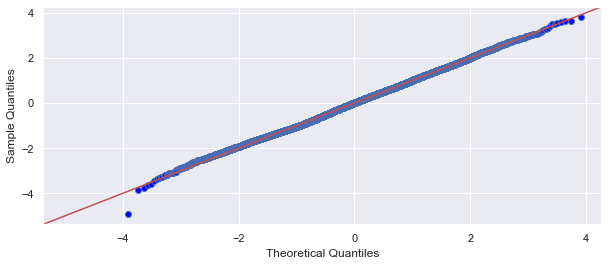

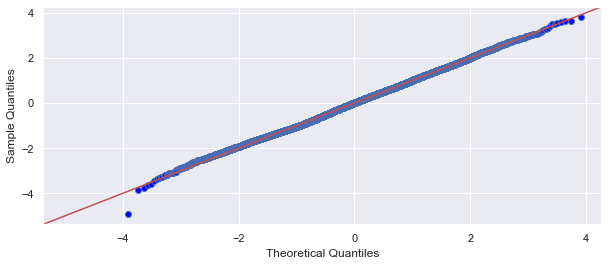

In [73]:
sm.graphics.qqplot(M_model4.resid, dist=stats.norm, line='45', fit=True)

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the model
# Get the features used in training
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(X,y, random_state = 12)

#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x3_train,y3_train)

y3_pred = OLS.predict(x3_test)



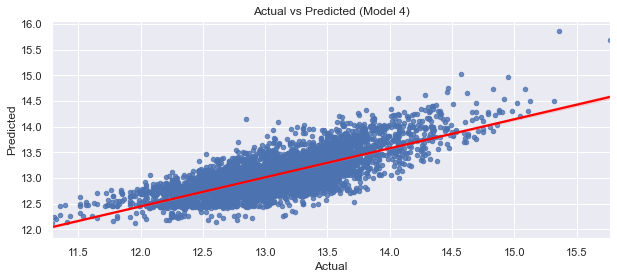

In [75]:

# Create a regression plot
sns.regplot(x=y3_test, y=y3_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Model 4)')

# Show the plot
plt.show()


# The Interpretation of the model

The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.580, indicating that approximately 58% of the variance in price can be
explained by 'sqft_living','waterfront','view_1','view_2,'view_3','view_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9'grade_10','grade_11','grade_12',grade_13'

the intercept is 11.2452 meaning that when all other variables are zero the estimated log transformed price is 11.2452 corresponding to significant increase in price

sqft_living: For each unit increase in square footage of living space, the log-transformed price is expected to increase by 0.0002 units. Larger living spaces are associated with higher log-transformed prices.

waterfront_1: Having a waterfront view is associated with an increase of 0.3442 units in the log-transformed price, holding other variables constant.

view_1, view_2, view_3, view_4: Having better views (higher view categories) is associated with increases in log-transformed price: 0.1791, 0.2237, 0.2555, and 0.3670 units, respectively.

grade_4, grade_5, grade_6, grade_7, grade_8, grade_9, grade_10 are not statistically significant

grade_11: An increase in grade from 11 is associated with an increase of 0.7652 units in the log-transformed price, holding other variables constant.
grade_12: An increase in grade from 12 is associated with an increase of 0.8580 units in the log-transformed price, holding other variables constant.
grade_13: An increase in grade from 13 is associated with an increase of 0.9900 units in the log-transformed price, holding other variables constant.

# conclusion
we can see that our R-squared has increased to 0.580 this is a good indication of a good fit.the rmse is also lower than the previous model
next well try to look at few features together with categorical variables to see if we can enhance our model


# Model 5

In [76]:

# model(more features and categorical variables)
# Determine X and y values
X = df.drop(['price', 'zipcode', 'long', 'Age_sold','year','lat','sqft_lot15',
             'sqft_lot','sqft_above','sqft_living15','waterfront',
             'floors'], axis=1)
X=sm.add_constant(X)
y=df["price"]
M_model5=sm.OLS(y,X).fit()

# RMSE
rmse = np.sqrt(M_model5.mse_resid)


print("THE RMSE: ", rmse)



M_model5.summary()

THE RMSE:  0.33737244347010437


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     5169.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:04:13   Log-Likelihood:                -7174.7
No. Observations:               21597   AIC:                         1.436e+04
Df Residuals:                   21590   BIC:                         1.442e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8598      0.025    431.845      0.000      10.811      10.909
bedrooms       -0.0163      0.003     -5.160      0.000      -0.022      -0.010
bathrooms       0.0056      0.005      1.167      0.243      -0.004       0.015
sqft_living     0.0002   4.97e-06     40.458      0.000       0.000       0.000
view            0.1066      0.003     30.510      0.000       0.100       0.113
condition       0.0954      0.004     26.383      0.000       0.088       0.102
grade           0.1916      0.003     60.182      0.000       0.185       0.198
==============================================================================
Omnibus:                        4.191   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.140
Skew:                           0.022   Prob(JB):                        0.126
Kurtosis:                       2.949   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

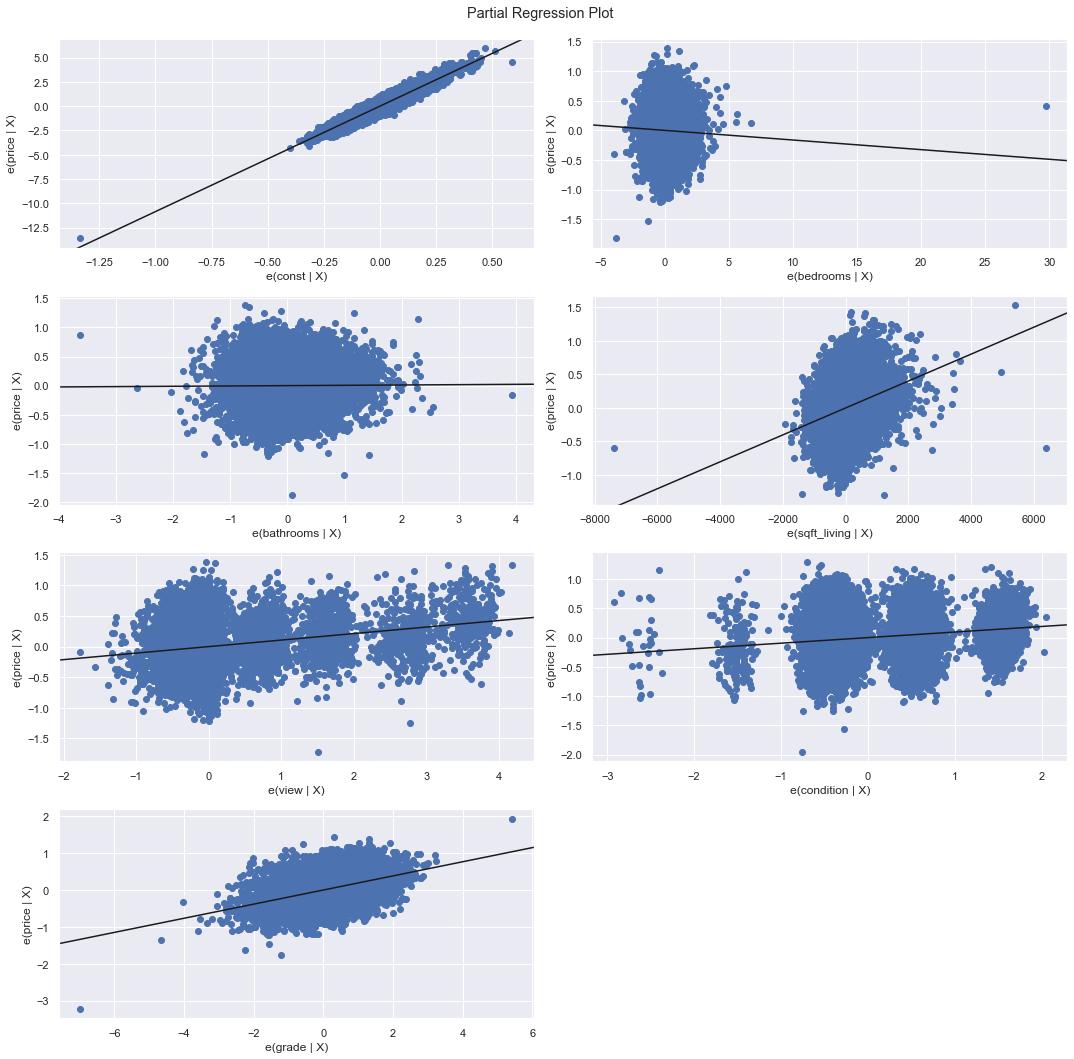

In [77]:


fig = plt.figure(figsize=(15, 15))
sm.graphics.plot_partregress_grid(M_model5, fig=fig)
plt.show()

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the model
# Get the features used in training
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(X,y, random_state = 12)

#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x4_train,y4_train)

y4_pred = OLS.predict(x4_test)



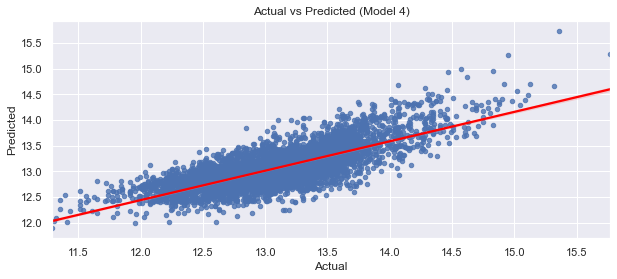

In [79]:
# Create a regression plot
sns.regplot(x=y4_test, y=y4_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Model 4)')

# Show the plot
plt.show()


# The Interpretation of the model

The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.590, indicating that approximately 59% of the variance in price can be explained by bedrooms,bathrooms,sqft_livn,view,condition,grade

The intercept is USD 10.8598, indicating that when all other variables are zero, the estimated log-transformed price is USD 10.8598.

bedrooms:

For each unit increase in the number of bedrooms, the log-transformed price is expected to decrease by USD 0.0163 units, holding other variables constant. More bedrooms are associated with a lower log-transformed price, all else being equal.

bathrooms:The coefficient is not statistically significant (p-value = 0.243).

sqft_living:For each unit increase in square footage of living space, the log-transformed price is expected to increase by USD 0.0002 units. Larger living spaces are associated with higher log-transformed prices.
view:

For each unit increase in the view category, the log-transformed price is expected to increase by USD 0.1066 units.
condition:

For each unit increase in the condition rating, the log-transformed price is expected to increase by USD 0.0954 units.
grade:

For each unit increase in the grade rating, the log-transformed price is expected to increase by USD 0.1916 units.



#SUMMARY OF THE MODELS

**Model 1a**. with 1 predictor (sqft_living) **R-squared:0.493**

**Model 1b**. with 1 predictor (transformed price):**R-squared:0.483**

**Model 2**. with all predictors (all_features):**R-squared:0.499**

***Model 3*** with 6 predictors (handled multicollinearity and low correlation):***R-squared: 0.560***  *** Adj. R-squared:	0.559***

***Model 4*** with 16 predictors (baseline and categorical variables):***R-squared: 0.580***  *** Adj. R-squared:	0.580***

***Model 5*** with 6 predictors (more features and categorical data and features low p-values):***R-squared: 0.590*** and *** Adj. R-squared:	0.589***

Model 1a (1 predictor - sqft_living): R-squared of 0.493 indicates that around 49.3% of the variance in the dependent variable is explained by sqft_living alone.

Model 1b (1 predictor - transformed price): R-squared of 0.483 indicates that around 48.3% of the variance in the log-transformed price is explained by the predictor.

Model 2 (all features): R-squared of 0.499 suggests that including all available predictors improves the explanation of variance compared to Model 1, but it's still relatively modest.

Model 3 (6 predictors - handled multicollinearity and low correlation): R-squared of 0.560 and Adj. R-squared of 0.559 indicate an improvement in explaining variance, and addressing multicollinearity and low correlation has positively impacted the model.

Model 4 (16 predictors - baseline and categorical variables): R-squared of 0.580 and Adj. R-squared of 0.580 indicate further improvement, especially with the inclusion of categorical variables.

Model 5 (6 predictors - more features, categorical data, and low p-values): R-squared of 0.590 and Adj. R-squared of 0.589 suggest the highest explanatory power among the mentioned models. The inclusion of more features, categorical data, and low p-values has contributed to the improved performance.




BEST MODEL
Model 5, which includes more features, categorical data, and low p-values, is chosen as the best model due to its higher R-squared value (0.590) and adjusted R-squared value (0.589).
This model strikes a balance between explanatory power and complexity.The RMSE of approximately 0.3374 suggests that, on average, the model's predictions deviate from the actual values by around 0.3374 log-transformed units. This gives an indication of the typical error in the model's predictions.





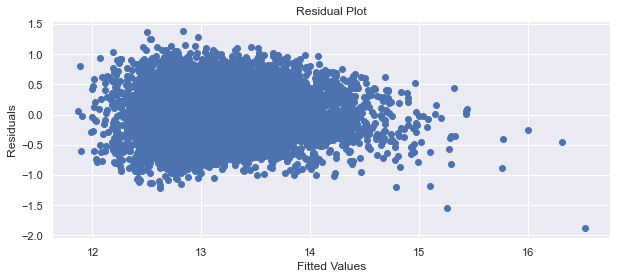

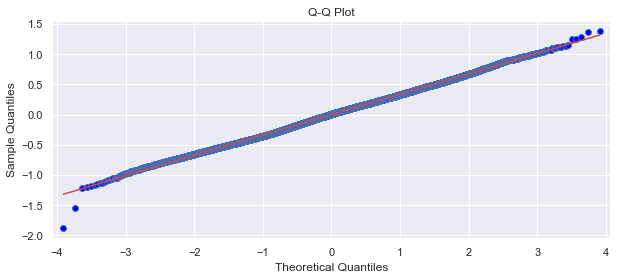

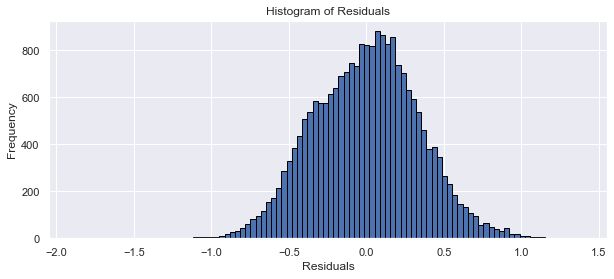

Homoscedasticity Test p-value: 1.1098177622590325e-60
Durbin-Watson Statistic: 1.9744406888716102


In [80]:
# EVALUATING OUR MODEL
## assumptions of linear regression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

residuals = M_model5.resid

# Residual Plot
# Residual Plot
plt.scatter(M_model5.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot for Normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Histogram for Normality
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Homoscedasticity Test
_, p_value, _, _ = het_breuschpagan(residuals, M_model5.model.exog)
print(f'Homoscedasticity Test p-value: {p_value}')

# Durbin-Watson Test for Independence
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')



ALL the variables pass the assumption of linearity,normality and homoscedasticity

The features that affect price are bedrooms, sqft_living, view, condition, and grade

grade is a major predictor of price with the highest coefficient.

# Recommendations:
based on findings from our model:

Consider the importance of bedrooms, sqft_living, view, condition, and grade when estimating or predicting housing prices.


Focus on upgrading property features to improve the overall grade. Communicate the potential financial returns associated with higher-grade properties.

Investigate the inconsistency in the impact of bathrooms on pricing. Collect additional data or refine the variable to better capture its significance.

Consider promoting properties with fewer bedrooms for buyers who prioritize cost-effectiveness. Highlight the advantages of smaller bedroom counts in terms of affordability.

Capitalize on properties with better views, incorporating visuals and descriptions that showcase the scenic surroundings to attract potential buyers.

Continuous efforts to improve the model can be made by exploring additional relevant features and refining existing ones.



# Conclusions:

Model Validity:

The model provides a substantial explanation of housing price variance. However, the impact of bathrooms needs further investigation to enhance the model's validity.

Property Features Influence Pricing:

Bedrooms, sqft_living, view, condition, and grade significantly influence housing prices. These features are essential considerations for buyers and sellers.

There are limitations to the model and we used log transformation to meet assupmtions of linearity


# NEXT STEPS
gathering additional data on the homes as there may be key features missing.

methods other than regression could be used to meet assumptions
